In [57]:
#from speedml import Speedml
import csv
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
import pg8000
import sys
import os
import pathlib2
import warnings
warnings.filterwarnings('ignore')

Upload data from home dir

In [107]:
home = pathlib2.Path.home()
full_path = home/"documents"/"github"/"SMART_goals"/"data"/"mouse_smart_data.csv"
full_path = str(full_path)
full_path
mdata = pd.read_csv(full_path)

Pull Recording date and set as index and change to datetime format 

In [108]:
def trip_mod(x):
    trimod = x[(x["anno.res_index_label"] >= 0.75) & (x["63x_call"] == "63x go")]
    return trimod

def dub_mod(x):
    dubmod = x[(x["anno.res_index_label"] >= 0.75) & (x["63x_call"] == "63x no go")]
    return dubmod

def morph_pend(x):
    morphpend = x[(x["anno.res_index_label"] >= 0.75) & (["63x_call"] == "No look")]
    return morphpend

def single_mod(x):
    singlemod = x[(x["anno.res_index_label"] < 0.75)]
    return singlemod

def trans_pend(x):
    transpend = x[(x["anno.res_index_label"] == 2)]
    return transpend

In [109]:
def reclassify(df):
    tri = trip_mod(df)
    tri['modality class'] = 'Triple Modality'
    dub = dub_mod(df)
    dub['modality class'] = 'Double Modality'
    morph_p = morph_pend(df)
    morph_p['modality class'] = 'Pending Morph'
    single = single_mod(df)
    single['modality class'] = 'EPhys Only'
    trans_p = trans_pend(df)
    trans_p['modality class'] = 'Pending Trans'
    return tri, dub, morph_p, single, trans_p

In [110]:
def concat_df(a, b, c, d, e):
    frames = (a, b, c, d, e)
    df = pd.concat(frames)
    return df

In [111]:
def modality_reclass(df):
    return concat_df(*reclassify(df))

In [112]:
mdata['recording_date'] = pd.to_datetime(mdata['recording_date'], format='%Y-%m-%d')
mdata['63x_call'].fillna("No look", inplace=True)
mdata['anno.res_index_label'].fillna(2, inplace=True)
mdata.set_index(['recording_date'], inplace = True)
mdata.head()

,anno.res_index_label,patched_cell_container,name,63x_call
recording_date,,,,
2018-01-02,1.000000,P8S4_180102_351_A01,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,63x go
2018-01-02,0.000000,P8S4_180102_352_A01,Chat-IRES-Cre-neo;Ai14-365769.04.02.02,No look
2018-01-02,0.745543,P8S4_180102_353_A01,Chat-IRES-Cre-neo;Ai14-365769.05.02.01,No look
2018-01-02,0.880454,P9S4_180102_401_A01,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,63x go
2018-01-02,1.000000,P9S4_180102_402_A01,Chat-IRES-Cre-neo;Ai14-365769.03.01.01,63x no go


In [113]:
mdata1 = modality_reclass(mdata)

## Need to figure out the duplicates appearing in more than one category

In [114]:
mdata1.to_csv("c:\users\rustym\")

,anno.res_index_label,patched_cell_container,name,63x_call,modality class
recording_date,,,,,
2018-01-02,1.000000,P8S4_180102_351_A01,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,63x go,Triple Modality
2018-01-02,0.880454,P9S4_180102_401_A01,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,63x go,Triple Modality
2018-01-02,1.000000,P9S4_180102_403_A01,Pdyn-T2A-CreERT2;Ai14-366659.05.01.01,63x go,Triple Modality
2018-01-03,0.784887,PAS4_180103_452_A01,Pdyn-T2A-CreERT2;Ai14-366660.04.02.01,63x go,Triple Modality
2018-01-08,1.000000,P8S4_180108_353_A01,Vipr2-IRES2-Cre;Pvalb-T2A-FlpO;Ai65-367940.02....,63x go,Triple Modality
2018-01-08,1.000000,P9S4_180108_401_A01,Nos1-CreERT2;Ai14-367206.04.01.01,63x go,Triple Modality
2018-01-08,1.000000,PAS4_180108_451_A01,Nos1-CreERT2;Ai14-367206.05.02.01,63x go,Triple Modality
2018-01-08,0.797261,PAS4_180108_452_A01,Nos1-CreERT2;Ai14-367206.05.02.02,63x go,Triple Modality
2018-01-09,1.000000,P2S4_180109_051_A01,Chat-IRES-Cre-neo;Ai14-367631.04.01.01,63x go,Triple Modality


In [115]:
mdata

,anno.res_index_label,patched_cell_container,name,63x_call
recording_date,,,,
2018-01-02,1.000000,P8S4_180102_351_A01,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,63x go
2018-01-02,0.000000,P8S4_180102_352_A01,Chat-IRES-Cre-neo;Ai14-365769.04.02.02,No look
2018-01-02,0.745543,P8S4_180102_353_A01,Chat-IRES-Cre-neo;Ai14-365769.05.02.01,No look
2018-01-02,0.880454,P9S4_180102_401_A01,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,63x go
2018-01-02,1.000000,P9S4_180102_402_A01,Chat-IRES-Cre-neo;Ai14-365769.03.01.01,63x no go
2018-01-02,1.000000,P9S4_180102_403_A01,Pdyn-T2A-CreERT2;Ai14-366659.05.01.01,63x go
2018-01-03,0.000000,P8S4_180103_351_A01,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.01,No look
2018-01-03,1.000000,P8S4_180103_352_A01,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.02,63x no go
2018-01-03,0.880454,PAS4_180103_451_A01,Pdyn-T2A-CreERT2;Ai14-366660.05.02.01,63x no go


Group Recording date with all other variables

In [15]:
mdata = mdata.groupby(['recording_date']).count()

mdata

,anno.res_index_label,patched_cell_container,name,63x_call
recording_date,,,,
2018-01-02,6,6,6,4
2018-01-03,4,4,4,3
2018-01-04,1,1,1,0
2018-01-05,1,1,1,0
2018-01-08,22,22,22,9
2018-01-09,17,17,17,10
2018-01-10,19,19,19,7
2018-01-11,13,13,13,9
2018-01-12,20,20,20,11


Change patched cell container to total pcc

In [16]:
mdata['total_pcc'] = mdata['patched_cell_container'].cumsum()

In [17]:
md = mdata.reset_index()

In [18]:
mdata_time = md[['recording_date', 'total_pcc']]
mdata_time.set_index(['recording_date'], inplace=True)

Set goal to 400 tubes

In [9]:
#mdata_time['goal'] = 3500

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
mdata_time.head()

,total_pcc
recording_date,
2018-01-02,6
2018-01-03,10
2018-01-04,11
2018-01-05,12
2018-01-08,34


Make line plot

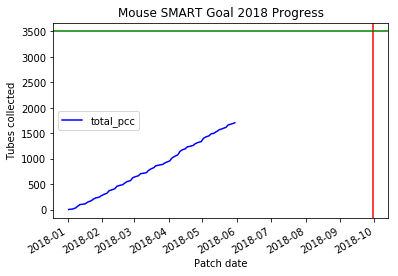

In [20]:
mdata_time.plot(color = ['b', 'g'])
plt.axvline('2018-09-30', color = 'r')
plt.axhline('3500', color='g')
plt.xlabel('Patch date')
plt.ylabel('Tubes collected')
plt.title('Mouse SMART Goal 2018 Progress')
full_fig_path = str(home/"documents"/"github"/"SMART_goals"/"figures"/"mouse_total_pcc.png")
plt.savefig(full_fig_path, dpi=300)